In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels as sm
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from imblearn.under_sampling import RandomUnderSampler

#Just in Case
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Estableciendo el directorio
os.chdir('D:\Social Data Consulting\DataPESADA')

In [3]:
#Importando nuestro archivo de trabajo
miArchivo="PS_20174392719_1491204439457_log.csv"
datos=pd.read_csv(miArchivo)
datos.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
pd.value_counts(datos.type)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

#### **_Binarizamos los datos_**

In [5]:
datos['CASH_OUT']=np.where(datos['type']=='CASH_OUT',1,0)
datos['PAYMENT']=np.where(datos['type']=='PAYMENT',1,0)
datos['CASH_IN']=np.where(datos['type']=='CASH_IN',1,0)
datos['TRANSFER']=np.where(datos['type']=='TRANSFER',1,0)
datos['DEBIT']=np.where(datos['type']=='DEBIT',1,0)

In [6]:
datos.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0,0,0


In [7]:
datos.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER',
       'DEBIT'],
      dtype='object')

In [8]:
#Seleccionando y reordenando nuestro DF
validos=['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud',
         'CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER','DEBIT']
datos=datos[validos]
datos.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1,0
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0


In [9]:
#Estableciendo los predictores y target
predictores=['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
target=['isFraud']

#### **_Particionamiento de los Datos_**

In [10]:
x=datos.loc[:,predictores].values
y=datos.loc[:,target].values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2020)

#### **_Seleccionando las variables importantes_**

In [12]:
# Instanciamos un objeto de clase DecisionTreeClassifier
tree_proc=DecisionTreeClassifier(max_depth=4)
tree_proc

DecisionTreeClassifier(max_depth=4)

In [13]:
#Aprendiendo de mis datos de entrenamiento
tree_proc=tree_proc.fit(X_train,y_train)

In [14]:
#Observando las variables mas importantes
importances=tree_proc.feature_importances_
importances

array([3.99643247e-02, 9.53276351e-01, 5.33087277e-04, 4.41917104e-05,
       6.18204569e-03])

In [15]:
#Generando los indices del array ordenado
indices=np.argsort(importances)
indices

array([3, 2, 4, 0, 1], dtype=int64)

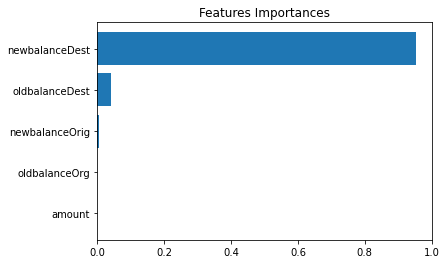

In [16]:
#Visualizando las variables mas importantes
importances=tree_proc.feature_importances_
indices=np.argsort(importances)
p=X_train.shape[1]

plt.figure()
plt.barh(range(p),importances[indices])
plt.title('Features Importances')
plt.yticks(range(p),predictores)
plt.show()

#### **_Grafico de arboles_**

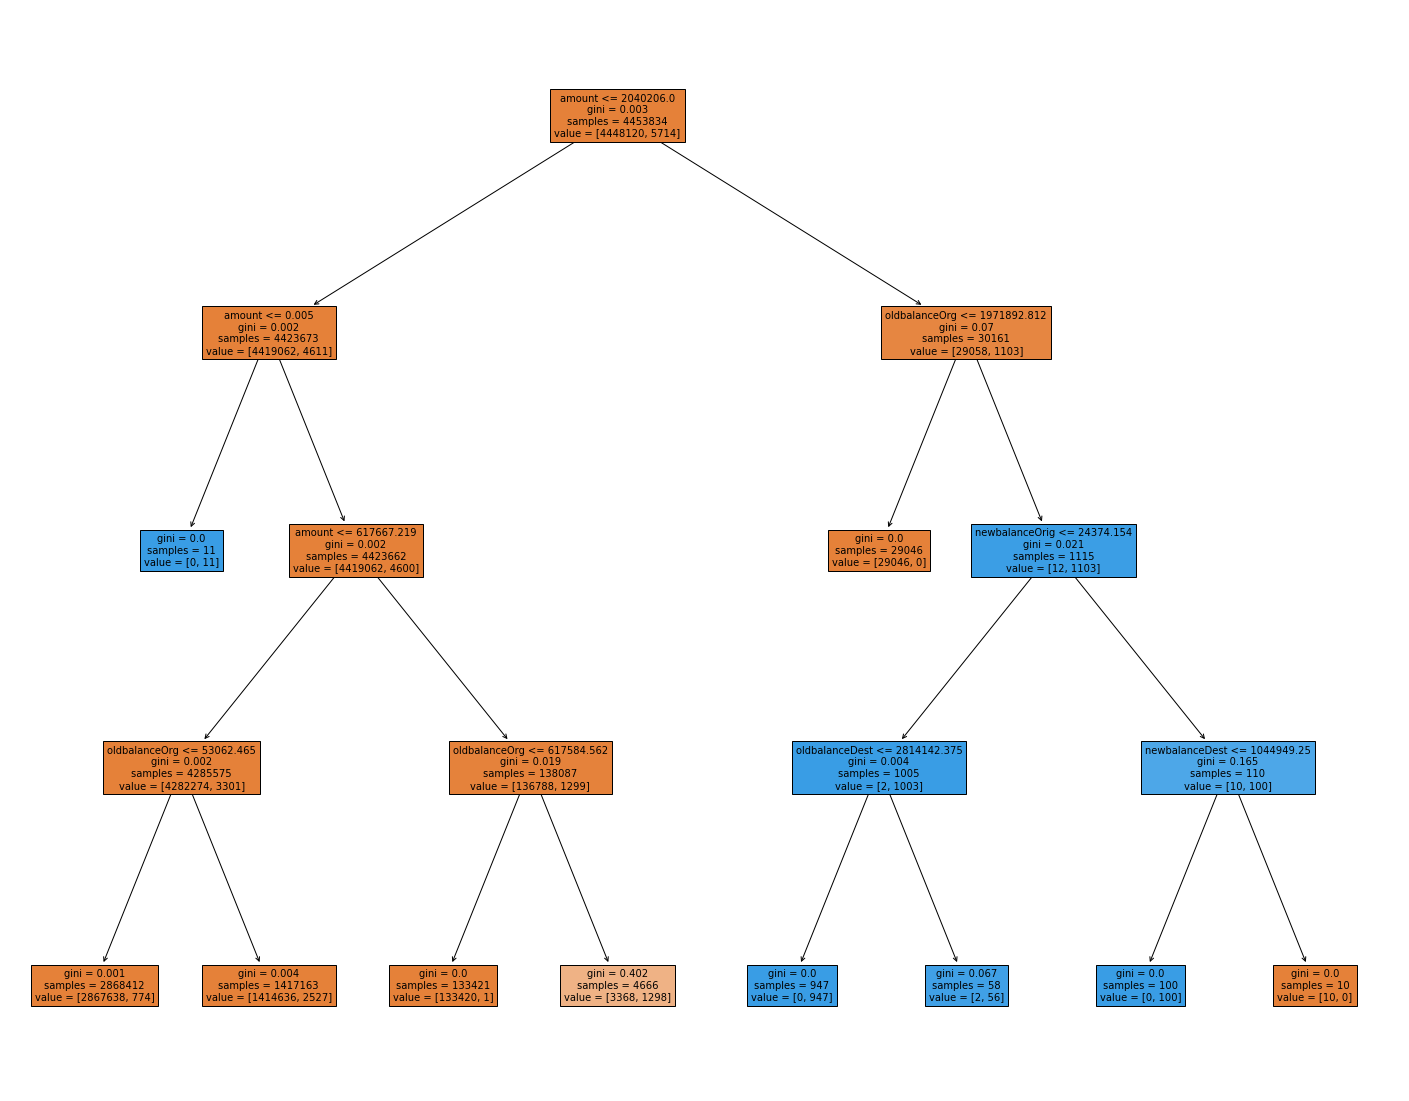

In [18]:
#Estableciendo un tamaño para el gráfico
fig=plt.figure(figsize=(25,20))
_=plot_tree(decision_tree=tree_proc,feature_names=predictores,filled=True)

#### **_Observando los puntos de corte_**

In [19]:
text_representation=export_text(decision_tree=tree_proc,feature_names=predictores)
print(text_representation)

|--- amount <= 2040206.00
|   |--- amount <= 0.00
|   |   |--- class: 1
|   |--- amount >  0.00
|   |   |--- amount <= 617667.22
|   |   |   |--- oldbalanceOrg <= 53062.46
|   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  53062.46
|   |   |   |   |--- class: 0
|   |   |--- amount >  617667.22
|   |   |   |--- oldbalanceOrg <= 617584.56
|   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  617584.56
|   |   |   |   |--- class: 0
|--- amount >  2040206.00
|   |--- oldbalanceOrg <= 1971892.81
|   |   |--- class: 0
|   |--- oldbalanceOrg >  1971892.81
|   |   |--- newbalanceOrig <= 24374.15
|   |   |   |--- oldbalanceDest <= 2814142.38
|   |   |   |   |--- class: 1
|   |   |   |--- oldbalanceDest >  2814142.38
|   |   |   |   |--- class: 1
|   |   |--- newbalanceOrig >  24374.15
|   |   |   |--- newbalanceDest <= 1044949.25
|   |   |   |   |--- class: 1
|   |   |   |--- newbalanceDest >  1044949.25
|   |   |   |   |--- class: 0



### **Balanceo de Datos**

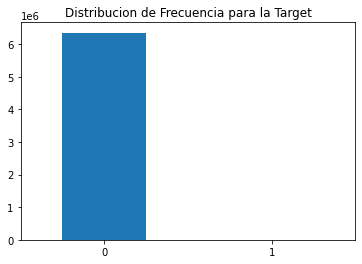

In [21]:
count=pd.value_counts(datos.isFraud)
count.plot(kind='bar',rot=0)
plt.title("Distribucion de Frecuencia para la Target")
plt.show()

In [22]:
#Estableciendo los predictores y target
predictores=['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
target=['isFraud']

### **_Particionamiento de los Datos_**

In [23]:
x=datos.loc[:,predictores].values
y=datos.loc[:,target].values

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2020)

In [25]:
#Instanciamos un objeto de clase RandomUnderSampler
us=RandomUnderSampler(sampling_strategy=0.8,random_state=2020)
X_train_bal,y_train_bal=us.fit_resample(X_train,y_train)

In [26]:
tree_proc2=DecisionTreeClassifier(max_depth=4)
tree_proc2

DecisionTreeClassifier(max_depth=4)

In [27]:
#Aprendiendo de los datos de entrenamiento
tree_proc2=tree_proc2.fit(X_train_bal,y_train_bal)

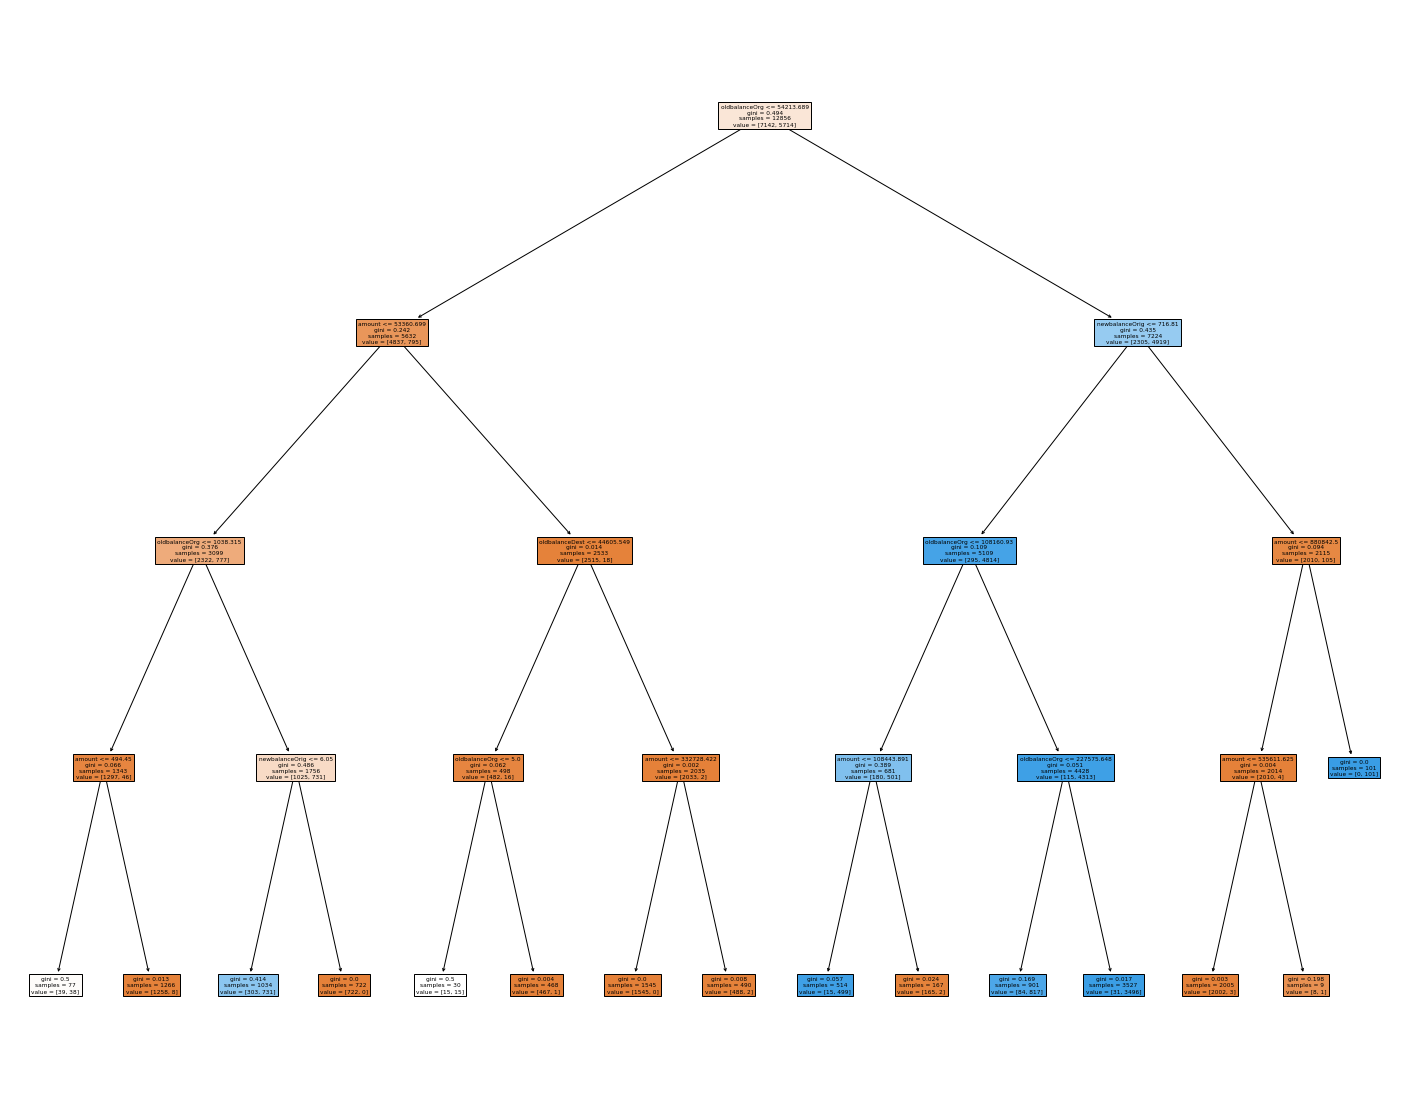

In [28]:
#Estableciendo un tamaño para el gráfico
fig=plt.figure(figsize=(25,20))
_=plot_tree(decision_tree=tree_proc2,feature_names=predictores,filled=True)

In [30]:
text_representation2=export_text(decision_tree=tree_proc2,feature_names=predictores)
print(text_representation2)

|--- oldbalanceOrg <= 54213.69
|   |--- amount <= 53360.70
|   |   |--- oldbalanceOrg <= 1038.32
|   |   |   |--- amount <= 494.45
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  494.45
|   |   |   |   |--- class: 0
|   |   |--- oldbalanceOrg >  1038.32
|   |   |   |--- newbalanceOrig <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- newbalanceOrig >  6.05
|   |   |   |   |--- class: 0
|   |--- amount >  53360.70
|   |   |--- oldbalanceDest <= 44605.55
|   |   |   |--- oldbalanceOrg <= 5.00
|   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  5.00
|   |   |   |   |--- class: 0
|   |   |--- oldbalanceDest >  44605.55
|   |   |   |--- amount <= 332728.42
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  332728.42
|   |   |   |   |--- class: 0
|--- oldbalanceOrg >  54213.69
|   |--- newbalanceOrig <= 716.81
|   |   |--- oldbalanceOrg <= 108160.93
|   |   |   |--- amount <= 108443.89
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  108443.89
|   |   

In [32]:
Source(text)

NameError: name 'text' is not defined